# 12. Clustering (K-means & DBSCAN), PCA

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA

from sklearn.metrics import silhouette_score

In [6]:
df = pd.read_csv('data/data12_CreditCard_sample.csv')
df.sample(3)

,TOTAL_PURCHASES,PRC_CASH_ADVANCE,CREDIT_LIMIT,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
8158,1161.212206,0.800760,1000.0,816.929180,0.000000
47,9432.078614,0.904429,12000.0,1012.415961,0.000000
8136,2953.315991,0.613580,3000.0,443.644764,0.111111


In [7]:
df.info()   # data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8636 entries, 0 to 8635
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   TOTAL_PURCHASES   8636 non-null   float64
 1   PRC_CASH_ADVANCE  8636 non-null   float64
 2   CREDIT_LIMIT      8636 non-null   float64
 3   MINIMUM_PAYMENTS  8636 non-null   float64
 4   PRC_FULL_PAYMENT  8636 non-null   float64
dtypes: float64(5)
memory usage: 337.5 KB


In [8]:
df.describe()  # the sum stats

,TOTAL_PURCHASES,PRC_CASH_ADVANCE,CREDIT_LIMIT,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
count,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000
mean,2019.619398,0.381541,4522.091030,864.304943,0.159304
std,2950.021139,0.442971,3659.240379,2372.566350,0.296271
min,0.010000,0.000000,50.000000,0.019163,0.000000
25%,379.667727,0.000000,1600.000000,169.163545,0.000000
50%,1095.557789,0.000000,3000.000000,312.452292,0.000000
75%,2556.502427,0.953255,6500.000000,825.496463,0.166667
max,49597.746886,1.000000,30000.000000,76406.207520,1.000000


In [9]:
x = StandardScaler().fit_transform(df)
x   # not a data frame

array([[-0.65230747, -0.86137261, -0.96257545, -0.30550763, -0.53772694],
       [ 1.49951204,  1.39624097,  0.67720406,  0.08768873,  0.21238001],
       [-0.42254327, -0.86137261,  0.81385235, -0.09990611, -0.53772694],
       ...,
       [-0.63569645, -0.86137261, -0.96257545, -0.32957217,  0.30614422],
       [-0.67225465,  1.39562711, -1.09922375, -0.34081076,  0.30614422],
       [-0.27096947, -0.62634214, -0.90791614, -0.32709767, -0.53772694]])

In [11]:
# K-means clustering
km = KMeans(n_clusters=6, n_init=25, random_state=101)
km.fit(x)

y_pred = km.predict(x)
y_pred

array([3, 5, 3, ..., 3, 1, 3])

In [12]:
# inertia= sum of inter-cluster distances
km.inertia_

14753.799058601324

In [13]:
km.cluster_centers_

array([[-0.14051765, -0.77541838,  0.08041747, -0.28780607,  2.18310998],
       [-0.15172568,  1.19707826, -0.42761659, -0.05963349, -0.42406797],
       [ 6.95680859,  0.14344264,  2.49720089,  0.95300822,  0.55121571],
       [-0.35253826, -0.78425977, -0.3011274 , -0.13620411, -0.34412283],
       [-0.02092203,  0.06837699, -0.08485419,  9.22950294, -0.52768089],
       [ 1.05626696,  0.47539683,  1.5139984 ,  0.32819665, -0.41193222]])

In [14]:
from collections import Counter  #counts obs.

cnt = Counter(np.sort(y_pred))
cnt
# there should be 4 clusters from looking at the 6

Counter({3: 3436, 1: 2572, 0: 1270, 5: 1233, 2: 69, 4: 56})

C:\Users\soyyo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\soyyo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\soyyo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\soyyo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

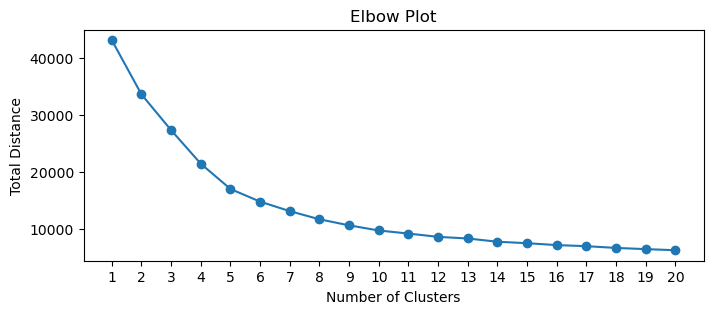

In [15]:
n_clusters = np.arange(1,21)      #an array not a data frame
inertia = np.zeros(n_clusters.shape[0]) 

for idx, nc in enumerate(n_clusters):
    model = KMeans(n_clusters=nc, random_state=101)
    model.fit(x)
    inertia[idx] = model.inertia_
    
fig,ax =plt.subplots(figsize=(8,3))
ax.scatter(n_clusters, inertia)
ax.plot(n_clusters, inertia)
ax.set(title="Elbow Plot",
      xlabel="Number of Clusters",
      ylabel="Total Distance")
ax.set_xticks(range(1,21,1))


In [16]:
#Purpose: WE want to know the characteristics of the clusters
km = KMeans(n_clusters=4, random_state=101)
km.fit(x)
y_pred = km.predict(x)
df['cluster']=y_pred
df.sample(5)

C:\Users\soyyo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,TOTAL_PURCHASES,PRC_CASH_ADVANCE,CREDIT_LIMIT,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,cluster
3709,675.532557,0.429028,2000.0,231.854555,0.0,1
1210,316.920000,0.000000,11000.0,71.089430,1.0,3
5536,2199.712456,0.992758,5500.0,1129.747227,0.0,2
3355,2813.630582,0.999996,2500.0,508.122732,0.0,2
1373,5094.180000,0.000000,8000.0,460.572295,0.0,1


C:\Users\soyyo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


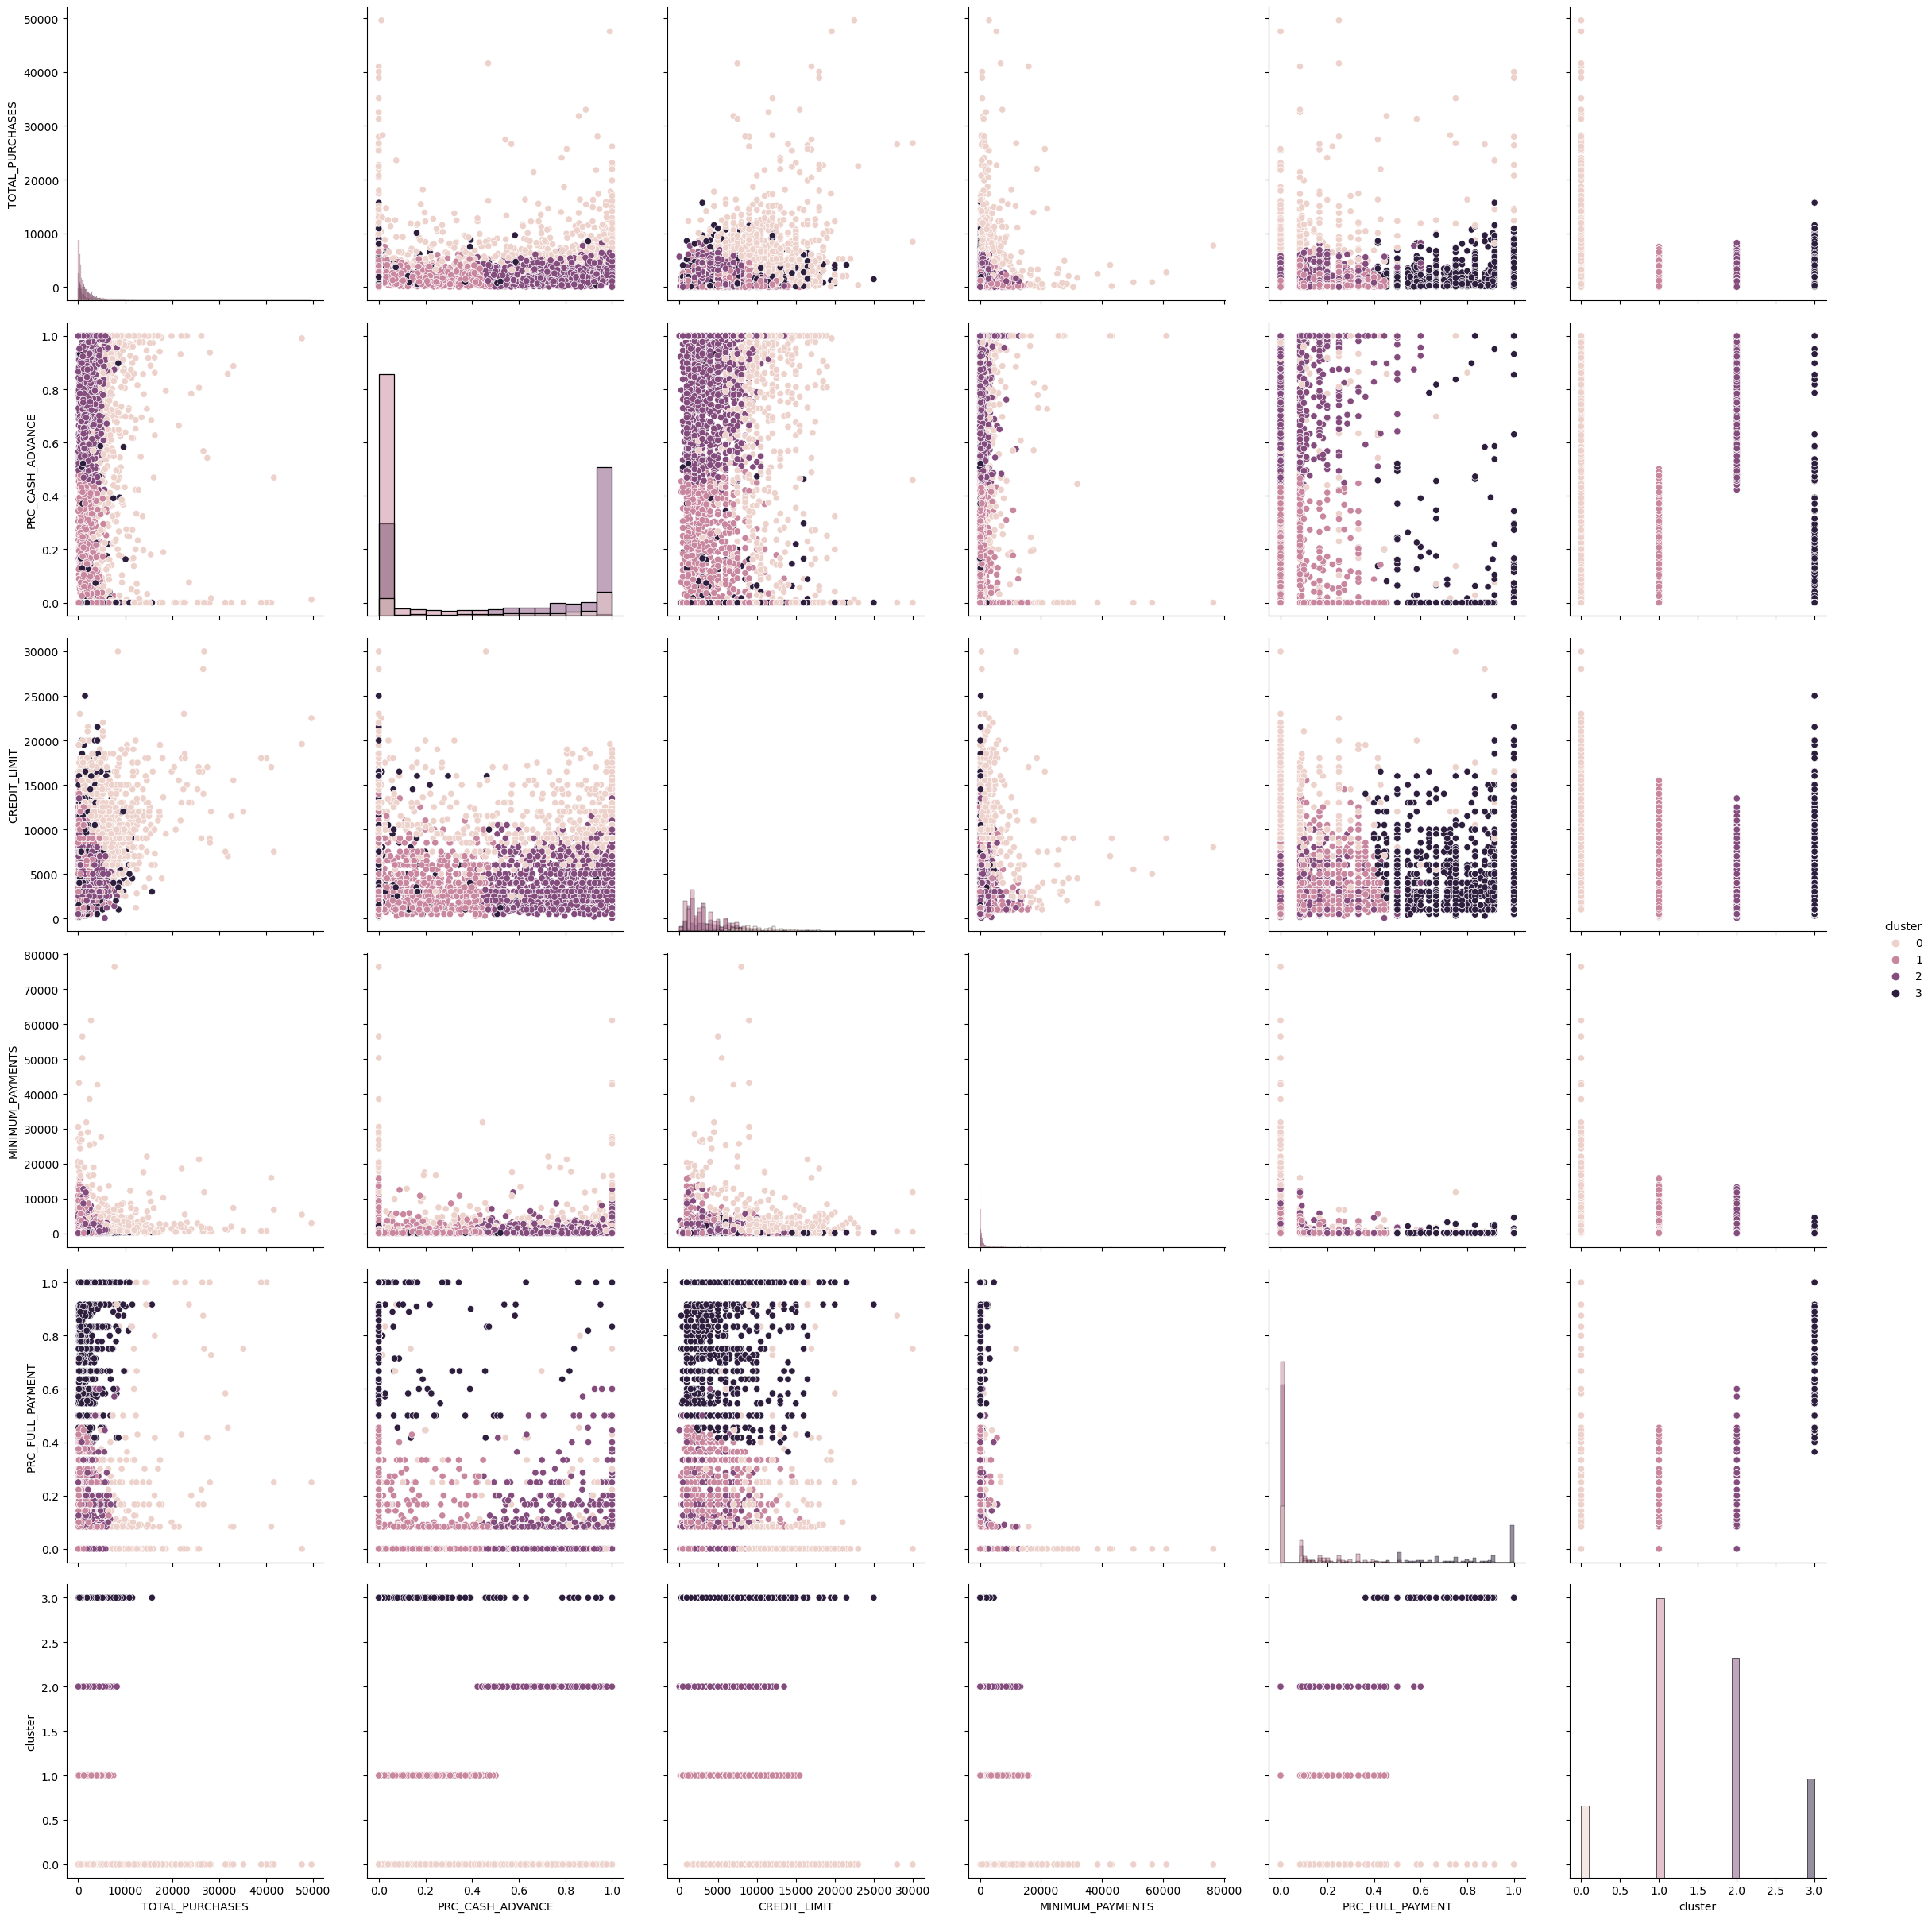

In [17]:
grid = sns.pairplot(df,vars=df.columns, hue='cluster', diag_kind='hist')
grid.fig.set_size_inches(25,25)

In [25]:
ss = silhouette_score(x, y_pred)
print(f'Silhouette Score={ss:.3f}')

Silhouette Score=0.399


In [31]:
db= DBSCAN(eps=0.25, min_samples=10)
db.fit(x)
db.components_
print(f'Number of Core points = {db.components_.shape[0]}')


Number of Core points = 5151


In [32]:
print(f'Cluster labels:{np.unique(db.labels_)}')

Cluster labels:[-1  0  1  2  3  4  5  6  7  8  9 10]


In [33]:
cnt= Counter(np.sort(db.labels_))
cnt

Counter({0: 4105,
         -1: 2812,
         1: 1133,
         2: 317,
         3: 192,
         6: 18,
         4: 13,
         8: 13,
         7: 11,
         10: 10,
         5: 6,
         9: 6})

In [34]:
y_pred = db.labels_
ss = silhouette_score(x, y_pred)
print(f'Silhouette Score={ss:.3f}')

Silhouette Score=-0.281


# PCA

In [35]:
pca = PCA(n_components=2, random_state=101)
xpca = pca.fit_transform(x)
xpca

array([[-1.23838347e+00, -3.87349504e-01],
       [ 1.77643551e+00, -6.05274923e-05],
       [-3.40676659e-02,  3.55150368e-01],
       ...,
       [-1.41004749e+00,  1.84479918e-01],
       [-7.50060479e-01, -1.13249940e+00],
       [-8.97815339e-01, -3.97815295e-01]])

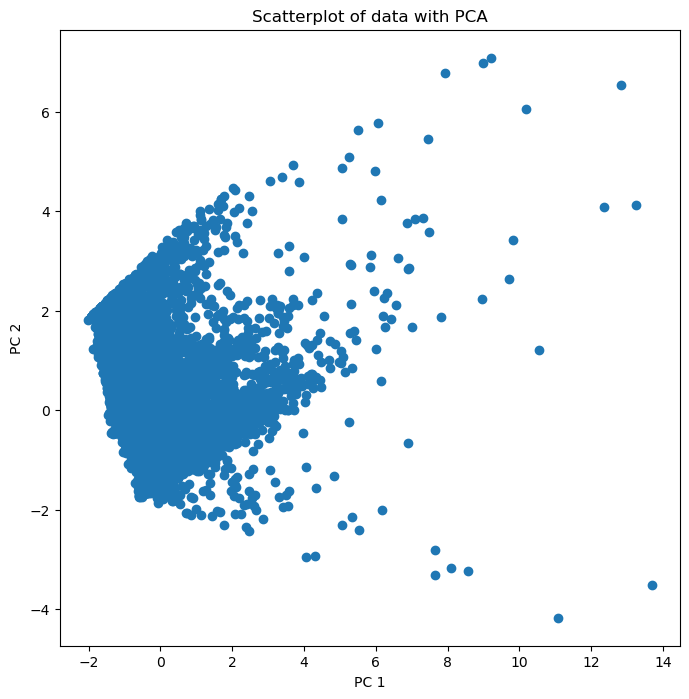

In [39]:
plt.figure(figsize=(8,8))
plot=plt.scatter(xpca[:,0],xpca[:,1])
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.title("Scatterplot of data with PCA")
plt.show()